# 01. Accuracy

In [69]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        pred=np.zeros((x.shape[0], 1))
        for i in range (x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [70]:
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [71]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('./titanic_train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop(['Survived'], axis=1)

x_titanic_df=transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf=MyDummyClassifier()
myclf.fit(x_train, y_train)

preds=myclf.predict(x_test)
print('Accuracy of Dummy Classifier: {0:.4f}'.format(accuracy_score(y_test, preds)))

Accuracy of Dummy Classifier: 0.7877


In [72]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)

digits=load_digits()

y=(digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [73]:
print('label testset size:', y_test.shape)
print('Dist of 0&1 in testset label')
print(pd.Series(y_test).value_counts())

fakeclf=MyFakeClassifier()
fakeclf.fit(x_train, y_train)
fakepred=fakeclf.predict(x_test)

print('Although all prediction is 0, Accuracy: {0:.3f}'.format(accuracy_score(y_test, fakepred)))

label testset size: (450,)
Dist of 0&1 in testset label
0    405
1     45
dtype: int64
Although all prediction is 0, Accuracy: 0.900


# 02. Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

$ Accuracy =\frac{TN+TP}{TN+FP+FN+TP} $

# 03. Precision & Recall 

$ Precision = \frac{TP}{FP+TP} $

$ Recall = \frac{TP}{FN+TP} $

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy, precision, recall))

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df=pd.read_csv('./titanic_train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop(['Survived'], axis=1)

x_titanic_df=transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf=LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
pred=lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[108  10]
 [ 14  47]]
Accuracy: 0.8659, Precision: 0.8246, Recall: 0.7705


### * Precision & Recall Trade-off

In [77]:
pred_proba=lr_clf.predict_proba(x_test)
pred=lr_clf.predict(x_test)
print('pred_proba result Shape: {0}'.format(pred_proba.shape))
print('\npred_proba head 3 \n:', pred_proba[:3])

pred_proba_result= np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('\nPredict value of the higher prob among two classes \n:', pred_proba_result[:3])

pred_proba result Shape: (179, 2)

pred_proba head 3 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]

Predict value of the higher prob among two classes 
: [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [78]:
from sklearn.preprocessing import Binarizer

x=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [79]:
from sklearn.preprocessing import Binarizer

pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.5)
custom_predict=binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

Confusion Matrix
[[108  10]
 [ 14  47]]
Accuracy: 0.8659, Precision: 0.8246, Recall: 0.7705


In [80]:
from sklearn.preprocessing import Binarizer

pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=0.4)
custom_predict=binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

Confusion Matrix
[[97 21]
 [11 50]]
Accuracy: 0.8212, Precision: 0.7042, Recall: 0.8197


In [81]:
thresholds=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict=binarizer.fit_transform(pred_proba_c1)
        print('\nThreshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


Threshold: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
Accuracy: 0.8212, Precision: 0.7042, Recall: 0.8197

Threshold: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
Accuracy: 0.8547, Precision: 0.7869, Recall: 0.7869

Threshold: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
Accuracy: 0.8659, Precision: 0.8246, Recall: 0.7705

Threshold: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
Accuracy: 0.8715, Precision: 0.8654, Recall: 0.7377

Threshold: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
Accuracy: 0.8771, Precision: 0.8980, Recall: 0.7213


In [82]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('Shape of Returned clf decision thr array:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('\nTen Index of thr array for sample:', thr_index)
print('Ten thr for sampling:', np.round(thresholds[thr_index],2))

print('\nPrecision by sample threshold:', np.round(precisions[thr_index],3))
print('Recall by sample threshold:', np.round(recalls[thr_index],3))

Shape of Returned clf decision thr array: (147,)

Ten Index of thr array for sample: [  0  15  30  45  60  75  90 105 120 135]
Ten thr for sampling: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]

Precision by sample threshold: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Recall by sample threshold: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


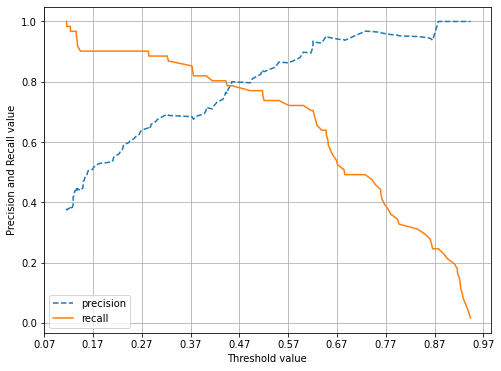

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

# 04. F1 Score

$ F1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}} = 2*\frac{prcision*recall}{precision+recall} $

In [56]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 score:{0:.4f}'.format(f1))

F1 score:0.7966


In [57]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


Threshold: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
Accuracy: 0.8212, Precision: 0.7042, Recall: 0.8197, F1: 0.7576

Threshold: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
Accuracy: 0.8547, Precision: 0.7869, Recall: 0.7869, F1: 0.7869

Threshold: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
Accuracy: 0.8659, Precision: 0.8246, Recall: 0.7705, F1: 0.7966

Threshold: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
Accuracy: 0.8715, Precision: 0.8654, Recall: 0.7377, F1: 0.7965

Threshold: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
Accuracy: 0.8771, Precision: 0.8980, Recall: 0.7213, F1: 0.8000


# 05. ROC Curve & AUC

In [68]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)
thr_index=np.arange(1, thresholds.shape[0], 5)

print('\nIndex of thr array for sample:', thr_index)
print('Thr for sampling:', np.round(thresholds[thr_index],2))

print('\nFPR by sample threshold:', np.round(fprs[thr_index],3))
print('TPR by sample threshold:', np.round(tprs[thr_index],3))


Index of thr array for sample: [ 1  6 11 16 21 26 31 36 41 46]
Thr for sampling: [0.95 0.63 0.55 0.46 0.35 0.32 0.25 0.22 0.12 0.02]

FPR by sample threshold: [0.01 0.06 0.1  0.15 0.25 0.29 0.45 0.5  0.79 1.  ]
TPR by sample threshold: [0.    0.444 0.537 0.648 0.704 0.796 0.833 0.889 0.926 1.   ]


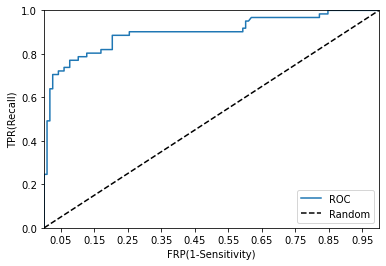

In [59]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FRP(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [61]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(x_test)[:,1]
roc_score=roc_auc_score(y_test, pred_proba)

print('ROC AUC Value: {0:.4f}'.format(roc_score))

ROC AUC Value: 0.8987


In [88]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 06. Prediction Pima Indian Diabetes

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('./diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [140]:
x= diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred=lr_clf.predict(x_test)
pred_proba=lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix
[[87 13]
 [22 32]]
Accuracy: 0.7727, Precision: 0.7111, Recall: 0.5926, F1: 0.6465, AUC: 0.8083


In [141]:
x_test.shape

(154, 8)

In [142]:
y_test.shape

(154,)

In [143]:
pred_proba_c1=lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1) 씨발 진짜 왜 안돼

SyntaxError: invalid syntax (<ipython-input-143-fd17838e095e>, line 2)

In [144]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


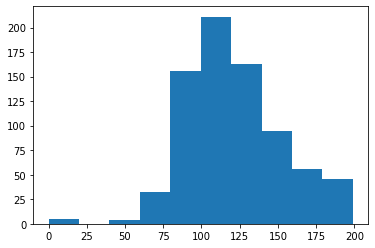

In [145]:
plt.hist(diabetes_data['Glucose'], bins=10);

In [146]:
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count=diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 Number of cases: {1}, Percentage: {2:.2f}%'.format(feature, zero_count, zero_count/total_count*100))

Glucose 0 Number of cases: 5, Percentage: 0.65%
BloodPressure 0 Number of cases: 35, Percentage: 4.56%
SkinThickness 0 Number of cases: 227, Percentage: 29.56%
Insulin 0 Number of cases: 374, Percentage: 48.70%
BMI 0 Number of cases: 11, Percentage: 1.43%


In [147]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [148]:
x=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
pred=lr_clf.predict(x_test)
pred_proba=lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

Confusion Matrix
[[90 10]
 [21 33]]
Accuracy: 0.7987, Precision: 0.7674, Recall: 0.6111, F1: 0.6804, AUC: 0.8433


In [156]:
thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba=lr_clf.predict_proba(x_test)

In [161]:
pred_proba[:,1].reshape(-1,1)

array([[0.03609018],
       [0.20217293],
       [0.15928588],
       [0.5681113 ],
       [0.41651923],
       [0.75549138],
       [0.83987164],
       [0.15198534],
       [0.19444674],
       [0.1077338 ],
       [0.66955827],
       [0.39625109],
       [0.04715651],
       [0.39291971],
       [0.26530665],
       [0.09318057],
       [0.79415787],
       [0.08938344],
       [0.5860422 ],
       [0.80457251],
       [0.41814913],
       [0.34954916],
       [0.06452018],
       [0.3194815 ],
       [0.30000267],
       [0.10537022],
       [0.92130861],
       [0.75027822],
       [0.17419735],
       [0.88879611],
       [0.23061778],
       [0.23754691],
       [0.11313996],
       [0.15306837],
       [0.10329326],
       [0.74313694],
       [0.2224308 ],
       [0.20825111],
       [0.85342706],
       [0.66495884],
       [0.41219643],
       [0.23686881],
       [0.70419015],
       [0.13055228],
       [0.34605328],
       [0.0150281 ],
       [0.46644956],
       [0.088

In [162]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


Threshold: 0.3


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').